# Episode 31. Who Is The Most Powerful Marvel Character?
## Fun Project: Dimensionality Reduction Of Marvel Superheroes

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA

## Load Data

In [ ]:
# Original Data Source: Marvel Supeheroes from Kaggle.com
# https://www.kaggle.com/dannielr/marvel-superheroes#marvel_dc_characters.csv
# This episode uses "superheroes_power_matrix.csv"
from google.colab import files
uploaded = files.upload()

Saving superheroes_power_matrix.csv to superheroes_power_matrix (3).csv


In [ ]:
# Store data in DataFrame
df = pd.read_csv("superheroes_power_matrix.csv")

In [ ]:
# Check data
print(df.shape)
print(df.keys)

(667, 168)
<bound method NDFrame.keys of                 Name  Agility  ...  Omnipresent  Omniscient
0            3-D Man     True  ...        False       False
1             A-Bomb    False  ...        False       False
2         Abe Sapien     True  ...        False       False
3           Abin Sur    False  ...        False       False
4        Abomination    False  ...        False       False
..               ...      ...  ...          ...         ...
662  Yellowjacket II    False  ...        False       False
663             Ymir    False  ...        False       False
664             Yoda     True  ...        False       False
665          Zatanna    False  ...        False       False
666             Zoom    False  ...        False       False

[667 rows x 168 columns]>


## Cleanup Data

In [ ]:
# save superhero names
df_hero = df['Name']
hero = df_hero.to_numpy()
hero = hero.reshape((hero.shape[0],))
print(hero.shape)

(667,)


In [ ]:
# save superpower - Exclude column 'Name'
df_X = df.loc[:, df.columns != 'Name']
# Convert True/False to 1/0
df_X = df_X.astype(int)
print(df_X.shape)

(667, 167)


In [ ]:
# save superpower names
df_X_names = df_X.columns
# numpy names
X_names = df_X_names.to_numpy()
X_names = X_names.reshape((X_names.shape[0],))
X_names.shape

(167,)

In [ ]:
# standardize data
mean = df_X.mean(axis=0)
std = df_X.std(axis=0)
df_X = (df_X - mean) / std

In [ ]:
# Confirm mean of X is 1
np.mean(df_X,axis=0)

Agility                 -7.623420e-17
Accelerated Healing     -1.707779e-16
Lantern Power Ring       6.741234e-18
Dimensional Awareness   -4.502479e-17
Cold Resistance         -1.413162e-16
                             ...     
Phoenix Force            6.058788e-17
Molecular Dissipation    1.706947e-16
Vision - Cryo            5.803911e-16
Omnipresent             -1.760627e-16
Omniscient              -1.760627e-16
Length: 167, dtype: float64

In [ ]:
# Confirm standard deviation of X is 1
np.std(df_X,axis=0)

Agility                  0.99925
Accelerated Healing      0.99925
Lantern Power Ring       0.99925
Dimensional Awareness    0.99925
Cold Resistance          0.99925
                          ...   
Phoenix Force            0.99925
Molecular Dissipation    0.99925
Vision - Cryo            0.99925
Omnipresent              0.99925
Omniscient               0.99925
Length: 167, dtype: float64

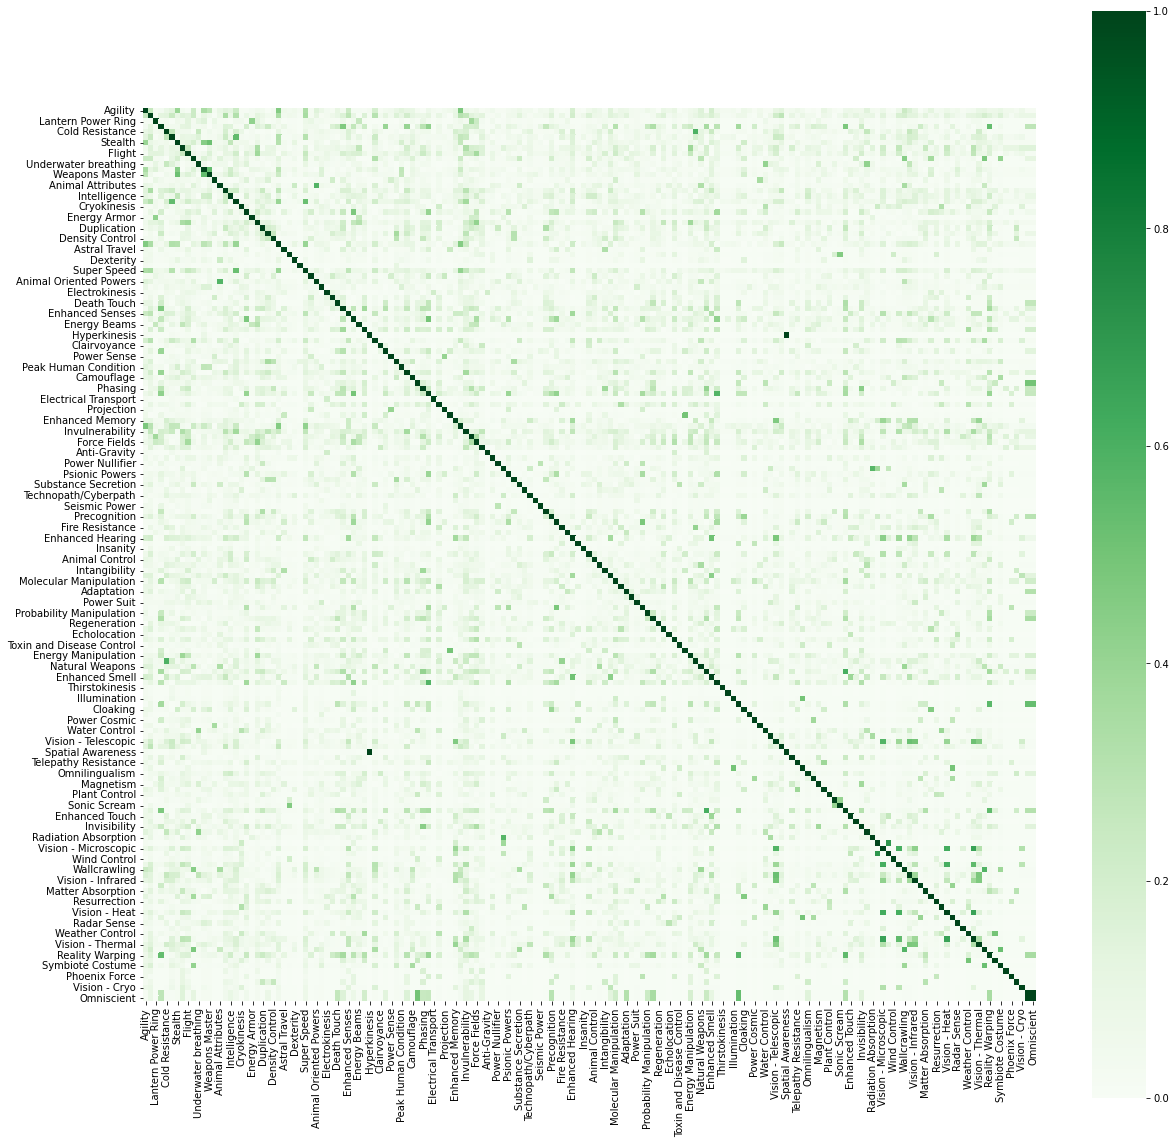

In [ ]:
# Plot Correlation Matrix
df_corr = df_X.corr(method = "spearman").abs()
# Set the figure size
f, ax = plt.subplots(figsize=(20, 20))
# Make heatmap
sns.heatmap(df_corr, cmap= "Greens", square=True, ax = ax)

In [ ]:
# convert to numpy array
X = df_X.to_numpy()

## Correlation Matrix

In [ ]:
# Step 3. Correlation matrix
R = np.matmul(np.transpose(X),X)
print(R)

[[666.         170.98304396  16.45276457 ...  48.40220942  10.42071097
   10.42071097]
 [170.98304396 666.         -16.58235185 ...  60.5372701   60.5372701
   60.5372701 ]
 [ 16.45276457 -16.58235185 666.         ...  -4.72958274  -4.72958274
   -4.72958274]
 ...
 [ 48.40220942  60.5372701   -4.72958274 ... 666.          -2.00300752
   -2.00300752]
 [ 10.42071097  60.5372701   -4.72958274 ...  -2.00300752 666.
  666.        ]
 [ 10.42071097  60.5372701   -4.72958274 ...  -2.00300752 666.
  666.        ]]


## Eigenvalues and Eigenvectors

In [ ]:
# get eigenvalues and eigenvectors using numpy (sort by largest eigenvalue)
w, v = LA.eig(R)
idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]
print(w)
print(v)

In [ ]:
# Select largest eigenvalue & eigenvector: w & v
w1 = w[0]
print(w1)
v1 = v[:,0:1]
print(v1)

### (1) Which Superpower Matters The Most?
#### (Eigenvector)

In [ ]:
# Find largest element in the (first) eigenvector
# i.e., largest element in eigenvector is the highest weight in 1D representation of superpower
#
#--------------------------------------
# largest absolute value of abs(v1)
v1_s = np.sort(v1,axis=0)
v1_si = np.argsort(v1,axis=0)
rank = np.arange(v1.shape[0]-1,-1,-1)
# create DataFrame for 1D-superpower (eigenvector sorted by size, ascending order)
vdim = v1.shape[0]
df_v1 = pd.DataFrame({'Superpower':X_names[v1_si].reshape((vdim,)), 'Rank':rank.reshape((vdim,)), 'Weight':v1_s.reshape((vdim,))})
#
#--------------------------------------
# largest absolute value of v1
v1abs_s = np.sort(np.abs(v1),axis=0)
v1abs_si = np.argsort(np.abs(v1),axis=0)
#rank = np.arange(v1.shape[0]-1,-1,-1)
# create DataFrame for 1D-superpower (eigenvector sorted by size, ascending order)
#vdim = v1.shape[0]
df_v1abs = pd.DataFrame({'Superpower':X_names[v1abs_si].reshape((vdim,)), 'Rank':rank.reshape((vdim,)), 'Weight':v1abs_s.reshape((vdim,))})

In [ ]:
# top 10 superpower: v1
print(df_v1.query('Rank <10'))

                Superpower  Rank    Weight
157         Thirstokinesis     9  0.010890
158      Animal Attributes     8  0.011238
159           Sonic Scream     7  0.011273
160          Seismic Power     6  0.011518
161               Insanity     5  0.012277
162      Spatial Awareness     4  0.012623
163           Hyperkinesis     3  0.012623
164    Weapon-based Powers     2  0.015679
165  Photographic Reflexes     1  0.016764
166   Peak Human Condition     0  0.035421


In [ ]:
# top 10 superpower: abs(v1)
# account for large influence in either positive or negative direction
print(df_v1abs.query('Rank <10'))

                Superpower  Rank    Weight
157            Immortality     9  0.149866
158           Force Fields     8  0.152050
159                Phasing     7  0.152051
160          Teleportation     6  0.158432
161            Time Travel     5  0.164902
162      Astral Projection     4  0.175577
163        Invulnerability     3  0.177237
164  Dimensional Awareness     2  0.177287
165      Time Manipulation     1  0.189801
166        Reality Warping     0  0.190937


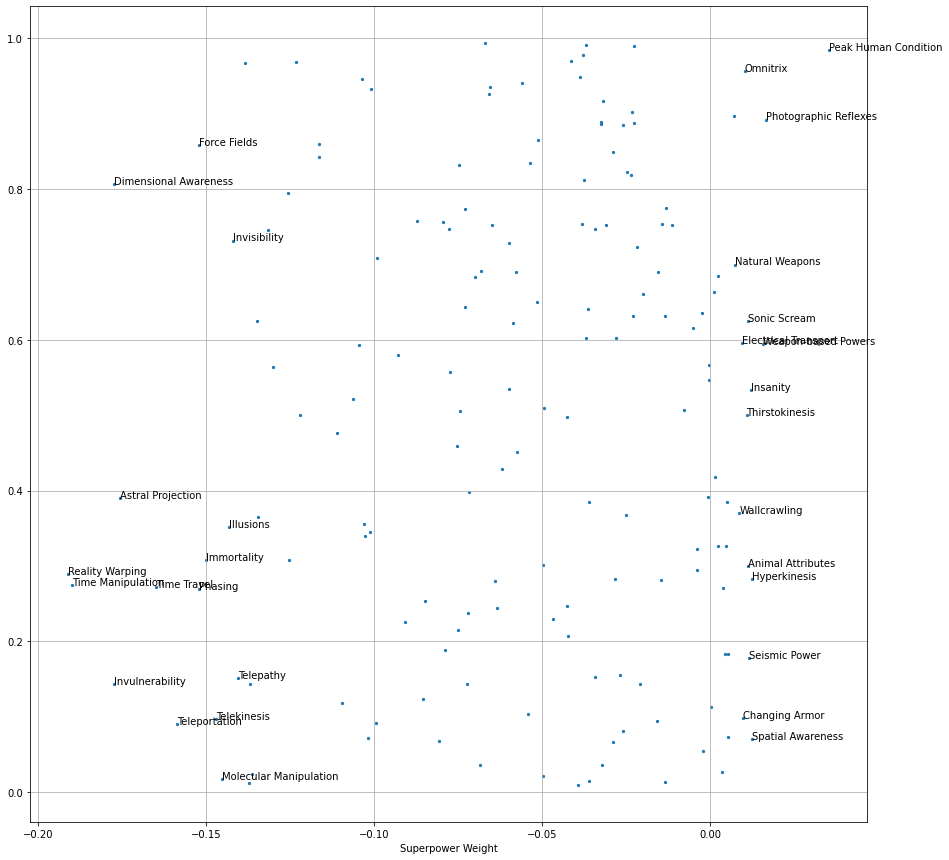

In [ ]:
# scatter plot
yy = np.zeros((v1.shape[0],))+np.random.rand(v1.shape[0])
xx = df_v1['Weight'].values
plt.scatter(xx,yy,marker='.',s=20)
plt.xlabel("Superpower Weight")
# most negative superpower
for idx in range(15):
  plt.annotate(df_v1['Superpower'][idx],(xx[idx],yy[idx]))
# most positive superpower
for ii in range(15):
  idx = df_v1.shape[0]-ii-1
  plt.annotate(df_v1['Superpower'][idx],(xx[idx],yy[idx]))
plt.grid()
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

### (2) Who Is The Most Powerful Marvel Character?
#### (Dimensionality Reduction & Principal Components)

In [ ]:
# Dimensionality Reduction: yk = x*vk
# 1D
y1 = np.matmul(X,v1)
print(y1)

In [ ]:
# sort principal components
y1_s = np.sort(y1,axis=0)
y1_si = np.argsort(y1,axis=0)
rank = np.arange(y1.shape[0]-1,-1,-1)
# create DataFrame for 1D-superhero (principal components sorted by size, ascending order)
ydim = y1.shape[0]
df_y1 = pd.DataFrame({'Superhero':hero[y1_si].reshape((ydim,)), 'Rank':rank.reshape((ydim,)), 'PC':y1_s.reshape((ydim,))})

In [ ]:
# top 10 superhero" y1 (most negative superhero)
# df_y1.query('Rank >630')
df_y1.head(20)

,Superhero,Rank,PC
0,Spectre,666,-22.641821
1,Man of Miracles,665,-20.525549
2,One-Above-All,664,-19.123082
3,Living Tribunal,663,-17.437892
4,Mister Mxyzptlk,662,-15.251491
5,Franklin Richards,661,-14.146857
6,Amazo,660,-12.902437
7,Dr Manhattan,659,-12.432094
8,Odin,658,-11.105370
9,Galactus,657,-10.339538


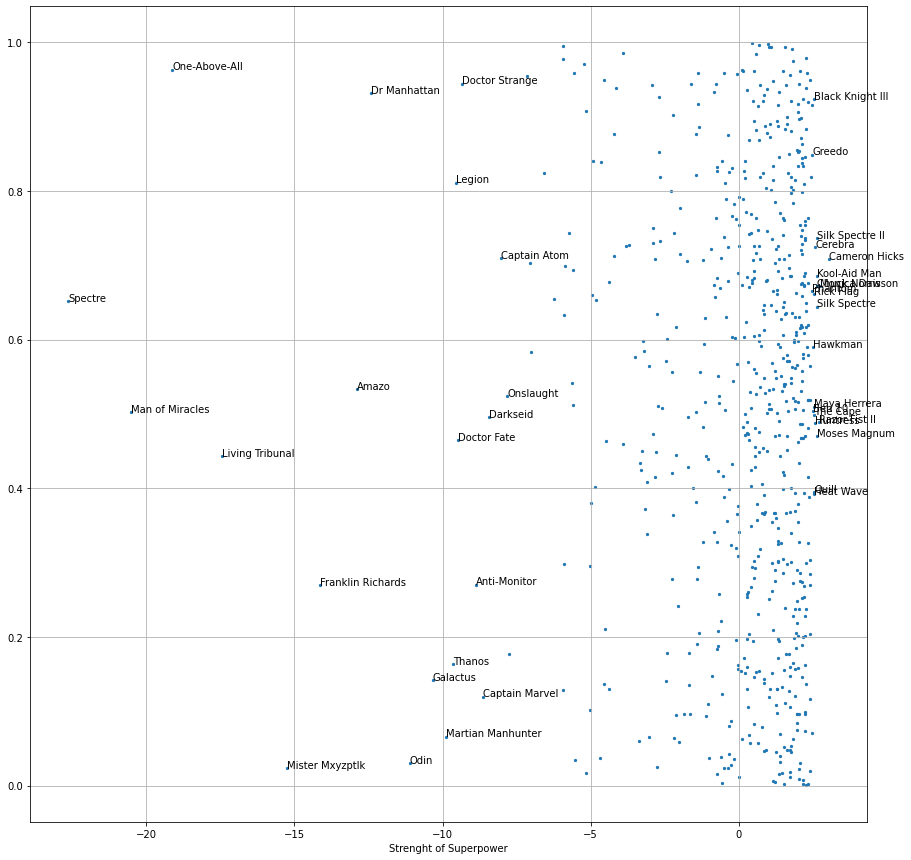

In [ ]:
# scatter plot
yy = np.zeros((y1.shape[0],))+np.random.rand(y1.shape[0])
xx = df_y1['PC'].values
plt.scatter(xx,yy,marker='.',s=20)
plt.xlabel("Strenght of Superpower")
# most negative superhero
for idx in range(20):
  plt.annotate(df_y1['Superhero'][idx],(xx[idx],yy[idx]))
# most positive superhero
for ii in range(20):
  idx = y1.shape[0]-ii-1
  plt.annotate(df_y1['Superhero'][idx],(xx[idx],yy[idx]))
plt.grid()
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

15 Most Powerful Marvel Characters, Ranked by Jason Robbins (https://collider.com/)

https://collider.com/most-powerful-marvel-characters-ranked/

Molecule Man
Franklin Richards
Sentry
Proteus
Legion
Hope Summers
Scarlet Witch
Gladiator
Captain Marvel
Dr. Strange
Hercules / Zeus
Thor / Odin
Apocalypse
Hulk / Red Hulk / Skaar
Vulcan

The Most Powerful Characters in Marvel (Power Ranking)
https://marvel.fandom.com/wiki/User_blog:TimeWiz/The_Most_Powerful_Characters_in_Marvel_(Power_Ranking)

One-Above-All
Heart of the Universe
Living Tribunal
Infinites
Phoenix Force
Enigma Force
Abraxas
Oblivion
Death
Eternity
Franklin Richards
Celestials
Vishanti
Octessence
Shuma-Gorath
Zom
Galactus
In-Betweener
Scrier
Watchers
He Who Remains
Time-Keepers
Cosmic Cube
Stranger
Demiurge
Atum
Dormammu
Elder Gods
Odin Borson